In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def plot_gray_img(gray):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.imshow(cv.cvtColor(gray,cv.COLOR_GRAY2RGB))
    plt.show()

def plot_img(img):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.imshow(img)
    plt.show()

img = cv.imread('form1.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

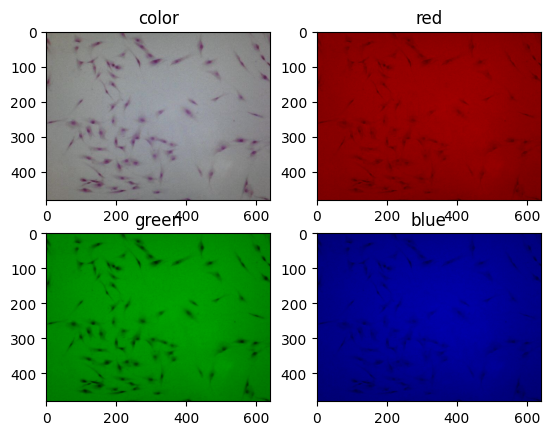

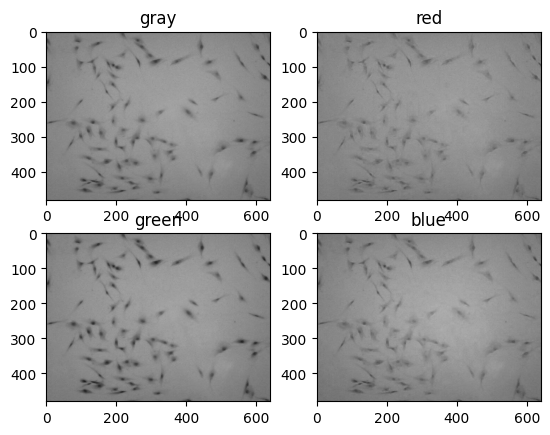

137.85108723958334
14.347980929755185


In [2]:
#plot_img(img)
#Черно-белый и по каналам:
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
#print(gray)
#plot_gray_img(gray)

red = np.array(img)
red[:,:,1] = 0;
red[:,:,2] = 0;

green = np.array(img)
green[:,:,0] = 0;
green[:,:,2] = 0;

blue = np.array(img)
blue[:,:,0] = 0;
blue[:,:,1] = 0;

# Графики в цвете:
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('color')
plt.subplot(2,2,2)
plt.imshow(red)
plt.title('red')
plt.subplot(2,2,3)
plt.imshow(green)
plt.title('green')
plt.subplot(2,2,4)
plt.imshow(blue)
plt.title('blue')
plt.show()

# Каналы в сером цвете для сравнения
red_gr, green_gr, blue_gr = cv.split(img)

plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(gray,cv.COLOR_GRAY2RGB))
plt.title('gray')
plt.subplot(2,2,2)
plt.imshow(cv.cvtColor(red_gr,cv.COLOR_GRAY2RGB))
plt.title('red')
plt.subplot(2,2,3)
plt.imshow(cv.cvtColor(green_gr,cv.COLOR_GRAY2RGB))
plt.title('green')
plt.subplot(2,2,4)
plt.imshow(cv.cvtColor(blue_gr,cv.COLOR_GRAY2RGB))
plt.title('blue')
plt.show()

avg = np.mean(gray)
s = np.std(gray)
print(avg)
print(s)


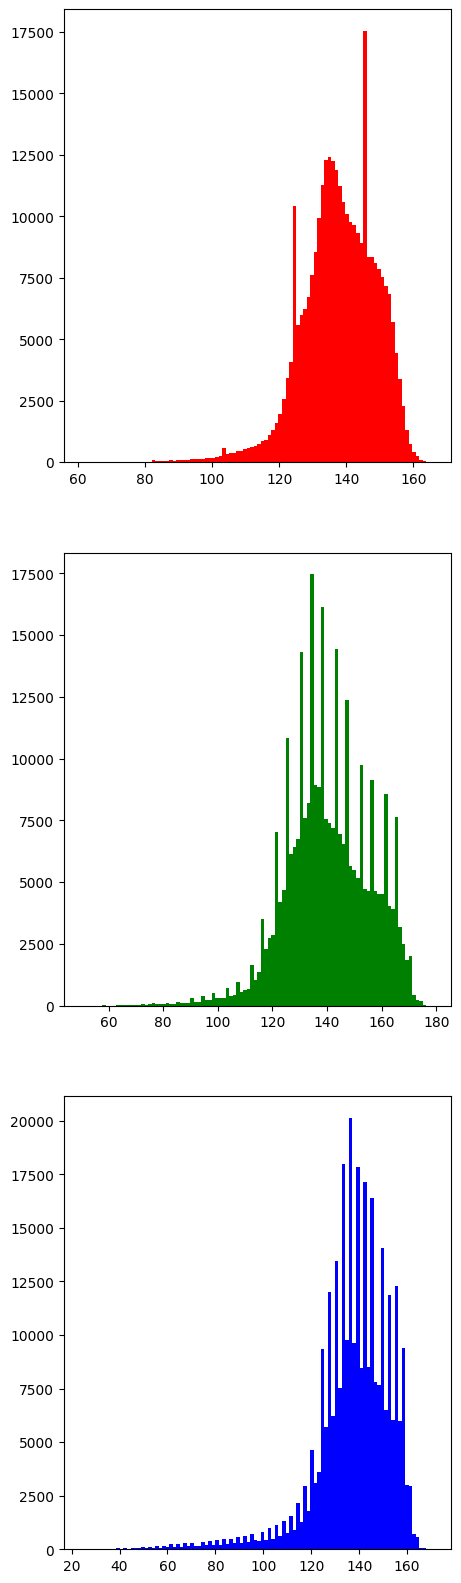

In [3]:
# Статистики первого порядка:
n = 100
plt.figure(figsize=(5,20))
plt.subplot(3,1,1)
rr = red_gr.ravel()
plt.hist(rr, bins=n, color='r');

plt.subplot(3,1,2)
br = blue_gr.ravel()
plt.hist(br, bins=n, color='g');

plt.subplot(3,1,3)
gr = green_gr.ravel()
plt.hist(gr, bins=n, color='b');

plt.show()

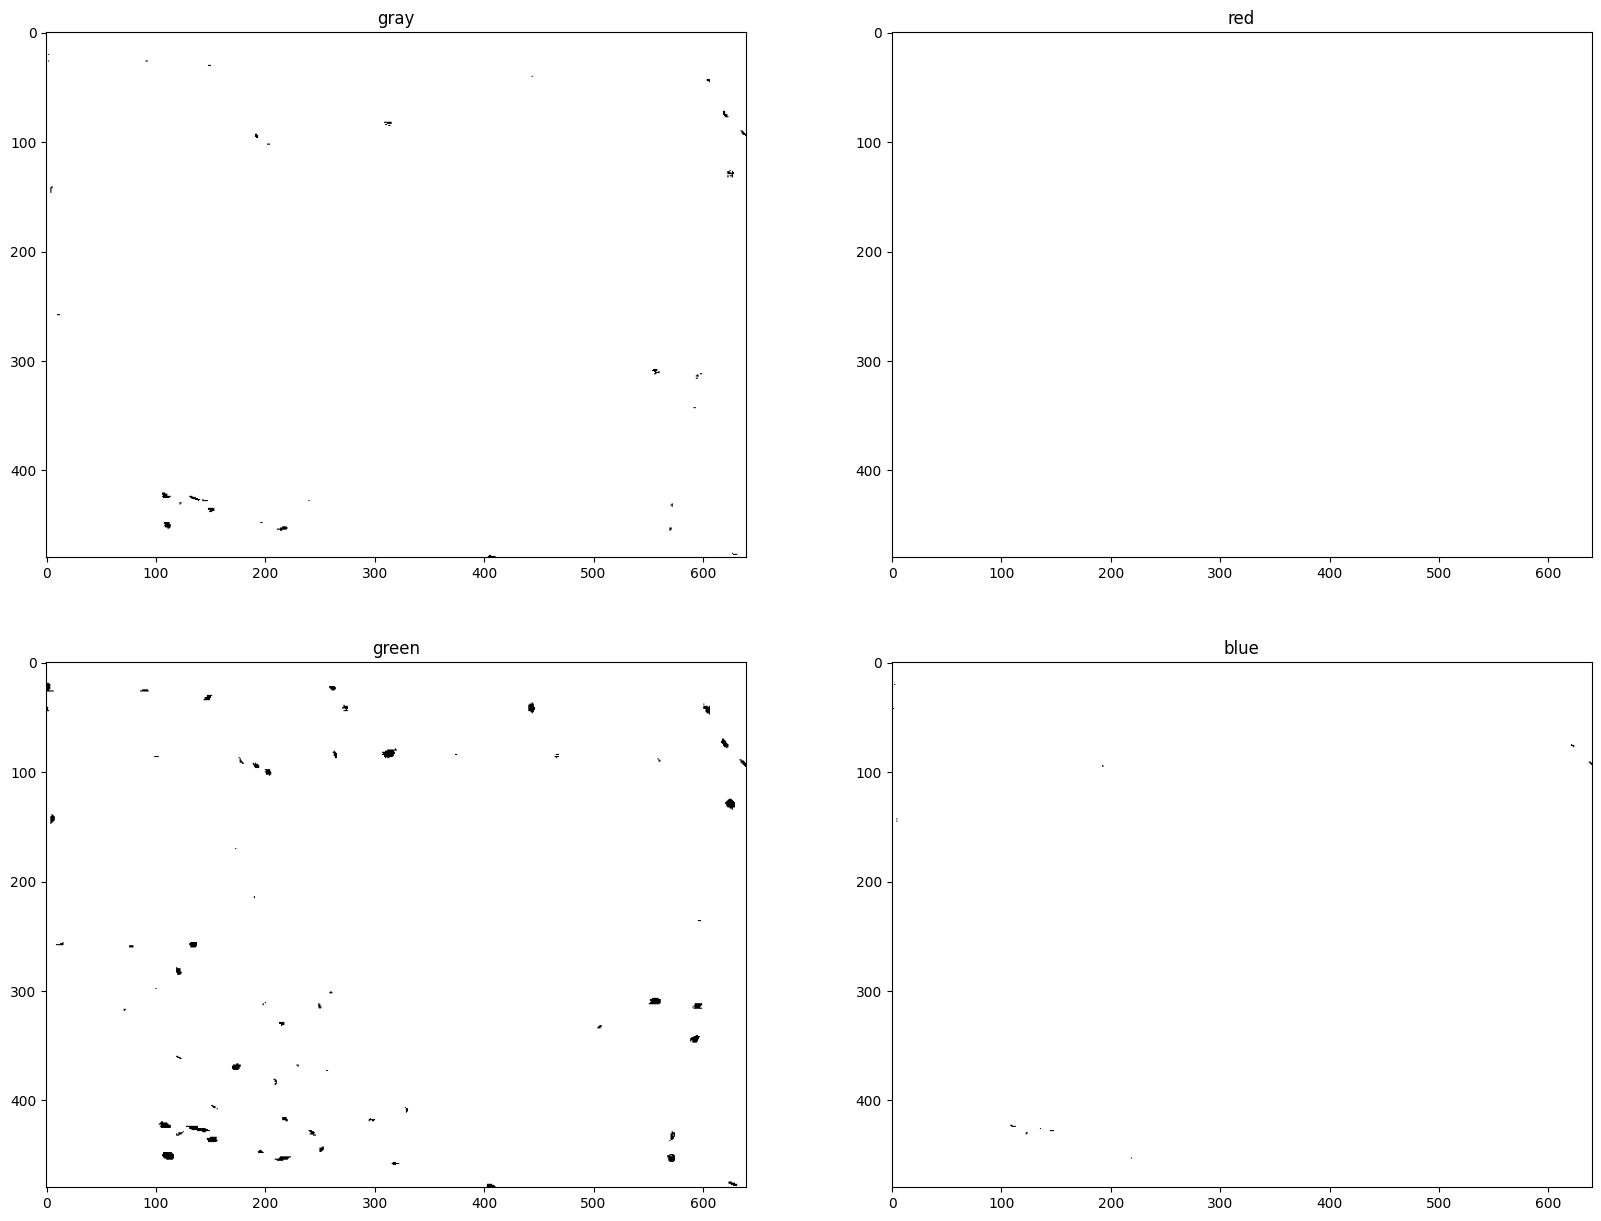

In [4]:
ret = 60
plt.figure(figsize=(20,15))
ret, tresh_gray = cv.threshold(gray,ret,255,0)
ret, tresh_red = cv.threshold(red_gr,ret,255,0)
ret, tresh_green = cv.threshold(green_gr,ret,255,0)
ret, tresh_blue = cv.threshold(blue_gr,ret,255,0)

plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(tresh_gray,cv.COLOR_GRAY2RGB))
plt.title('gray')
plt.subplot(2,2,2)
plt.imshow(cv.cvtColor(tresh_red,cv.COLOR_GRAY2RGB))
plt.title('red')
plt.subplot(2,2,3)
plt.imshow(cv.cvtColor(tresh_green,cv.COLOR_GRAY2RGB))
plt.title('green')
plt.subplot(2,2,4)
plt.imshow(cv.cvtColor(tresh_blue,cv.COLOR_GRAY2RGB))
plt.title('blue')
plt.show()

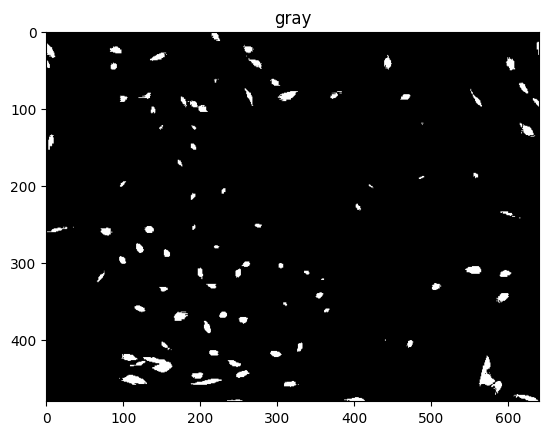

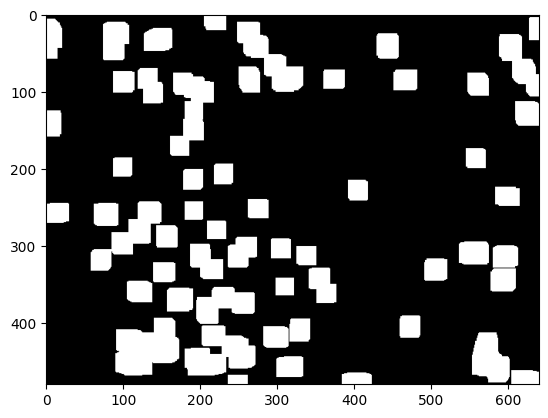

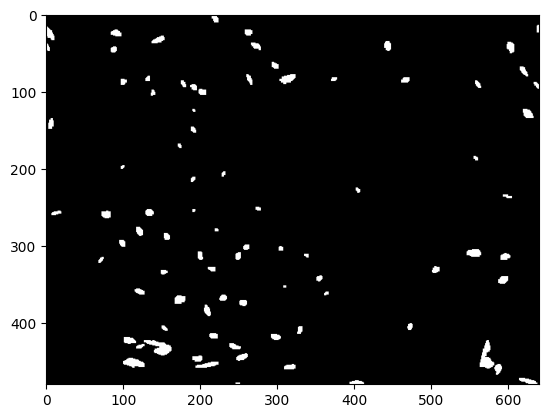

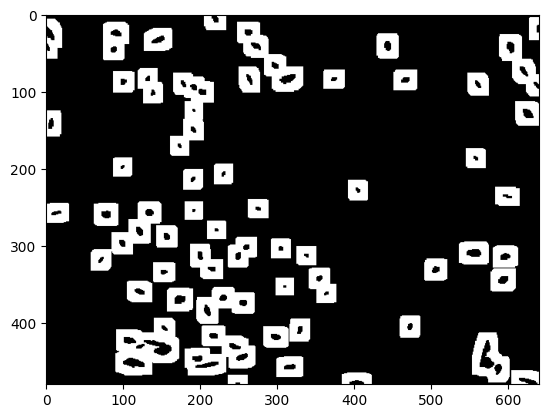

84


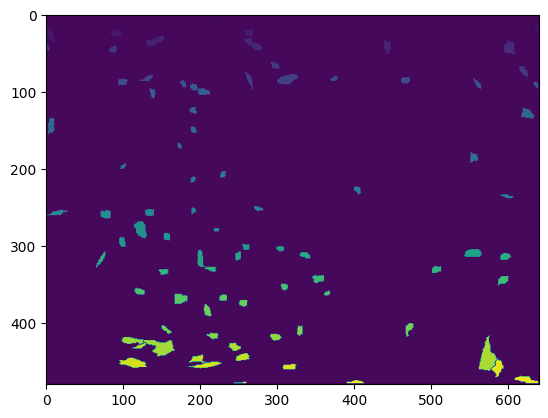

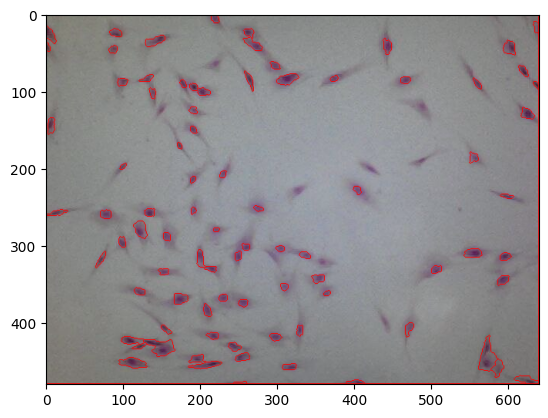

In [18]:
# Алгоритм водораздела
ret, thresh = cv.threshold(gray,100,255,0)
thresh = cv.bitwise_not(thresh)
plt.imshow(cv.cvtColor(thresh,cv.COLOR_GRAY2RGB))
plt.title('gray')
plt.show()

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 1)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=10)
plt.imshow(cv.cvtColor(sure_bg,cv.COLOR_GRAY2RGB))
plt.show()
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
plt.imshow(cv.cvtColor(sure_fg,cv.COLOR_GRAY2RGB))
plt.show()
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(cv.cvtColor(unknown,cv.COLOR_GRAY2RGB))
plt.show()

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
print(ret-1)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(cv.cvtColor(gray,cv.COLOR_GRAY2RGB),markers)
segmented_img = np.array(img)
segmented_img[markers == -1] = [255,0,0]

plt.imshow(markers)
plt.show()
plt.imshow(segmented_img)
plt.show()